In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import gc
import os
import re
import sklearn
import sys

from joblib import Parallel, delayed
from tqdm import *

%matplotlib inline
%load_ext autoreload
%autoreload 1

In [2]:
src_dir = os.path.join(os.getcwd(), os.pardir, '../src')
sys.path.append(src_dir)

In [3]:
%aimport data.movielens_20m_imdb

from data.movielens_20m_imdb import load_or_get_from_cache

In [4]:
INTERIM_DATA_ROOT = os.path.abspath("../../data/interim/movielens-ml20m-imdb/")
ML_ROOT = "/media/felipe/SAMSUNG/movielens/ml-20m/"
IMDB_ROOT = "/media/felipe/SAMSUNG/imdb/"

PATH_TO_MOVIES = ML_ROOT + "/movies.csv"
PATH_TO_TAG_ASSIGNMENTS = ML_ROOT + "/tags.csv"
PATH_TO_MOVIE_PLOTS = IMDB_ROOT+"/plot.list"

In [10]:
docs_df = load_or_get_from_cache(PATH_TO_MOVIES,PATH_TO_TAG_ASSIGNMENTS,PATH_TO_MOVIE_PLOTS,INTERIM_DATA_ROOT)

In [11]:
docs_df.head()

,movie_id,title,unique_tags,num_users,num_unique_tags,plot
0,1,Toy Story (1995),"pixar,animation,disney,tom-hanks,computer-anim...",152.0,25,A little boy named Andy loves to be in his ro...
1,2,Jumanji (1995),"robin-williams,fantasy,time-travel,animals,boa...",46.0,25,After being trapped in a jungle board game fo...
2,3,Grumpier Old Men (1995),"moldy,old,sequel,old-people-that-is-actually-f...",15.0,15,Things don't seem to change much in Wabasha C...
3,4,Waiting to Exhale (1995),"chick-flick,characters,revenge,clv",4.0,4,This story based on the best selling novel by...
4,5,Father of the Bride Part II (1995),"steve-martin,family,wedding,pregnancy,diane-ke...",11.0,16,"In this sequel to ""Father of the Bride"", Geor..."


In [12]:
docs_df.describe()

,movie_id,num_users,num_unique_tags
count,6312.000000,6312.000000,6312.000000
mean,33417.617712,15.161280,11.594265
std,36928.739114,27.283774,8.262508
min,1.000000,2.000000,2.000000
25%,3642.500000,3.000000,4.000000
50%,7927.500000,6.000000,9.000000
75%,62435.250000,15.000000,19.000000
max,130490.000000,561.000000,25.000000


In [13]:
docs_df.describe(include=['object'])

,title,unique_tags,plot
count,6312,6312,6312
unique,6312,6264,6311
top,Sarah Silverman: Jesus Is Magic (2005),"nudity-topless,betamax",Where the Red Fern Grows is the heartwarming ...
freq,1,5,2


(1, 30)

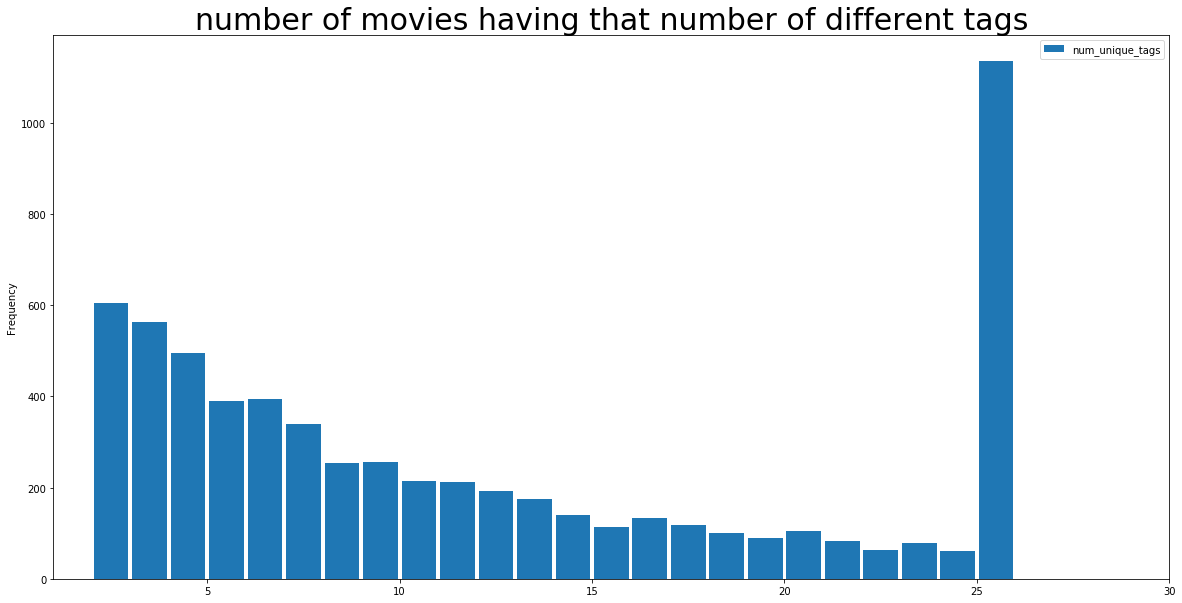

In [31]:
docs_df[['num_unique_tags']].plot(kind='hist',bins=np.arange(1.0,30,1),rwidth=0.9)

plt.gcf().set_size_inches(20,10)
plt.gca().set_title('number of movies having that number of different tags',fontsize=30)
plt.gca().set_xlim(1,30)

## number of unique tags

In [ ]:
tagsets = [tagset.split(',') for tagset in docs_df["tags"].values]

flat_list = []

for tagset in tagsets:
    for tag in tagset:
        flat_list.append(tag)
        
flat_set = set(flat_list)

In [ ]:
len(flat_set)